In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# definimos lattice
xi,xf,N=-3,3,21
x = np.linspace(xi,xf,N)
y = x.copy()

In [3]:
X,Y = np.meshgrid(x,y)

In [5]:
#plt.scatter(X,Y)

In [12]:
def GetCharges(N=2):
    
    Q = np.zeros(N)
    r = np.zeros((N,2))
    
    Q[0] = 1
    Q[1] = -1
    
    r[0] = [0.05,0.1]
    r[1] = [0.05,-0.1]
    
    return Q,r

In [13]:
Q,rq=GetCharges()

In [14]:
rq

array([[ 0.05,  0.1 ],
       [ 0.05, -0.1 ]])

In [16]:
def GetEx(x,y,xi,yi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2
    
    return q*(x-xi)/d**(3/2)

In [17]:
def GetEy(x,y,xi,yi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2
    
    return q*(y-yi)/d**(3/2)

In [22]:
def GetSum(x,y):
    
    Ex = 0.
    Ey = 0.
    
    for q in range(rq.shape[0]):
        Ex += GetEx(x,y,rq[q][0],rq[q][1],Q[q])
        Ey += GetEy(x,y,rq[q][0],rq[q][1],Q[q])
        
    return Ex,Ey

In [25]:
GetSum(0,0)

(0.0, -143.1083505599865)

In [26]:
def GetField(x,y):
    
    Ex = np.zeros((N,N))
    Ey = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            Ex[i,j],Ey[i,j] = GetSum(x[i],y[j])
            
    return Ex,Ey

In [27]:
Ex,Ey = GetField(x,y)

<IPython.core.display.Javascript object>


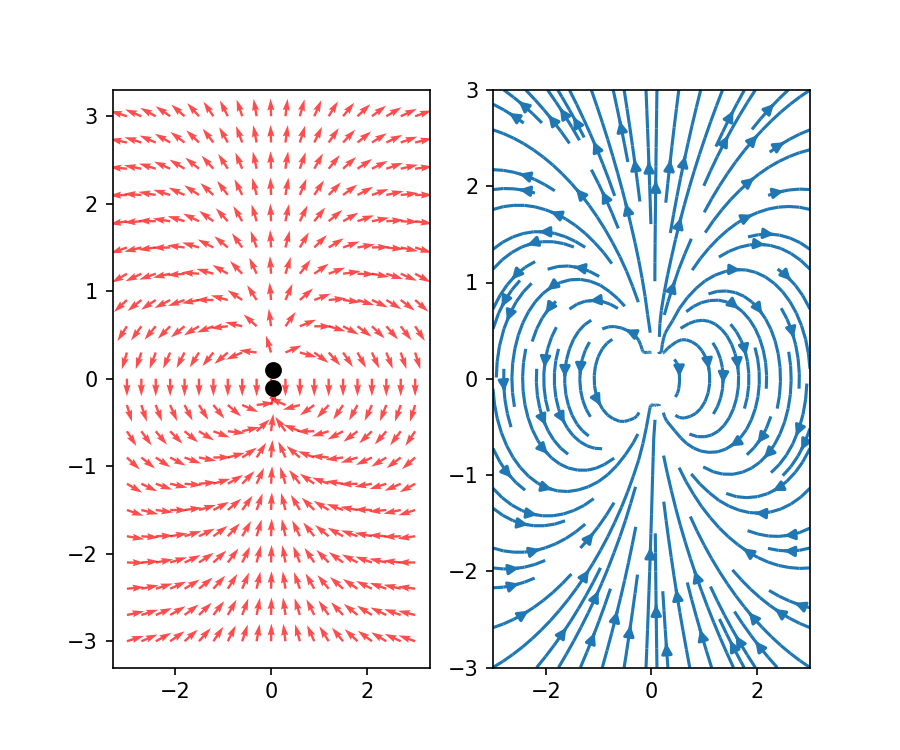

In [34]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,2,1)

for i in range(N):
    for j in range(N):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j],color='r',alpha=0.7)
        
ax.scatter(rq[:,0],rq[:,1],color='k',s=50)

ax1 = fig.add_subplot(1,2,2)
ax1.streamplot(X,Y,Ex.T,Ey.T)
